In [33]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
import corner
%matplotlib inline

In [34]:
#Volviendo a tomar una recta de la forma y = mx + b
m = 1.3
b =  3.1
N = 1000

In [35]:
x, y, yerr = np.loadtxt('data.txt', unpack=True)

In [36]:
def lnlike(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    return -0.5*(np.sum((y-(model))**2 + np.log(2.*np.pi*yerr**2)))

In [37]:
plist = [0.0,5.0,0.0,5.0]

In [38]:
def lnprior(theta, plist):
    m, b = theta
    if plist[0] < m < plist[1] and plist[2] < b < plist[3]:
        return 0.0
    return -np.inf

In [39]:
sigma_m = 0.1
sigma_b = 0.3

In [40]:
m_new = np.random.uniform(m_i,sigma_m,1000)
#plt.plot(m_new)

In [41]:
b_new = np.random.uniform(b_i,sigma_b,1000)
#plt.plot(b_new)
#plt.show()

In [42]:
def Pasos(theta_i,theta_p):
    if (lnprior(theta_p,theta_p)):
        return theta_i    
    p_i=lnlike(theta_i)
    p_p=lnlike(theta_p)
    p_n=np.exp(p_p-p_i)
    p_n=min(1.,p_n)
    if (p_n==1.):
        return theta_p
    else:
        x=random()
        if (p_n>=x):
            return theta_p
        else:
            return theta_i
    return

In [45]:
NS = 1000
Nc = 10
theta_in = [1.3,3.1]
c = []
w = []

In [49]:
for j in range(Nc):
    for i in range(N):
        theta_i = np.array([np.random.normal(theta_in[0],sigma_m),np.random.normal(theta_in[1], sigma_b)],)
        for l in range(NS):
            if l==0:
                cadena = theta_i
            else:
                theta_p = np.array([np.random.normal(theta_in[0], sigma_m),np.random.normal(theta_in[1], sigma_b)])
                theta_n = Pasos(theta_i,theta_p)
                cadena = np.concatenate((cadena,theta_n))
                theta_i = theta_n
        if i==0:
            c = cadena
        else:
            c = np.vstack((c,cadena))
    w = c

In [50]:
chain = c[:,:].reshape((-1, 2))

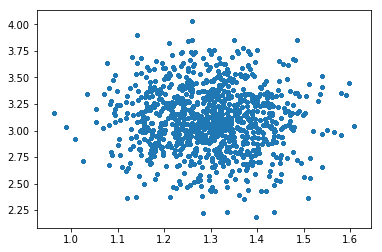

In [51]:
plt.scatter(chain[:,0],chain[:,1],s=None, marker='.')
plt.show()

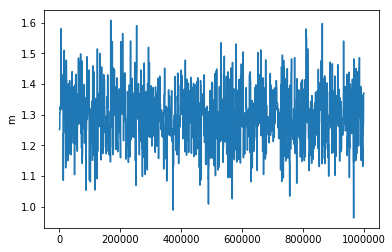

In [52]:
plt.plot(chain[:,0])
plt.ylabel('m')
plt.show()

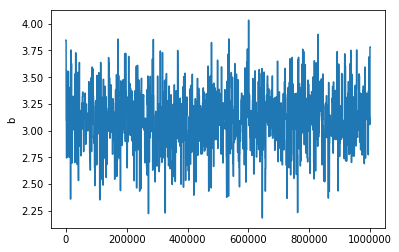

In [53]:
plt.plot(chain[:,1])
plt.ylabel('b')
plt.show()

In [54]:
#plt.hist(chain[:,0])

In [55]:
#plt.hist(chain[:,1])

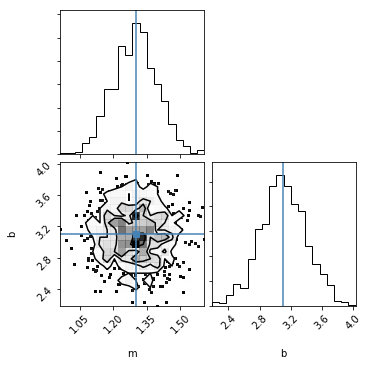

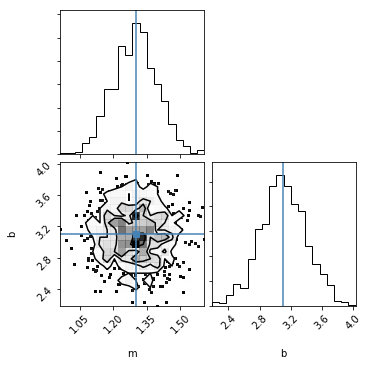

In [56]:
corner.corner(chain, labels=['m', 'b'],truths=[1.3,3.1])